In [ ]:
import json
import pandas as pd

# Yelpのビジネスデータを読み込み
with open('data/yelp/yelp_academic_dataset_business.json') as biz_f:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])

# Yelpのレビューデータを読み込み
with open('data/yelp/yelp_academic_dataset_review.json') as review_file:
    review_df = pd.DataFrame([json.loads(x) for x in review_file.readlines()])

# YelpのビジネスデータからcategoriesがNightlife（ナイトライフ@<fn>{nightlife}）またはRestaurants(レストラン)のデータを取り出し
twobiz = biz_df[biz_df['categories'].apply(lambda x:  len(set(x) &  set(['Nightlife', 'Restaurants'])) > 0)]

# 取り出した2つのカテゴリのYelpのビジネスデータとYelpのレビューデータを結合する
twobiz_reviews = twobiz.merge(review_df, on='business_id', how='inner')

# 必要ない特徴量を排除
twobiz_reviews = twobiz_reviews[['business_id', 'name', 'stars_y', 'text', 'categories']]

# target列を作成。categoriesがNightlifeの時はTrue、それ以外の場合はFalse
twobiz_reviews['target'] =  twobiz_reviews['categories'].apply(set(['Nightlife']).issubset)

twobiz_reviews

In [88]:
from sklearn.model_selection import train_test_split

# サンプリングしてクラス均衡を是正したデータセットを作成
nightlife = twobiz_reviews[twobiz_reviews['categories'].apply(set(['Nightlife']).issubset)]
restaurants = twobiz_reviews[twobiz_reviews['categories'].apply(set(['Restaurants']).issubset)]

nightlife_subset = nightlife.sample(frac=0.1, random_state=123)
restaurant_subset = restaurants.sample(frac=0.021, random_state=123)
combined = pd.concat([nightlife_subset, restaurant_subset])

# 学習データとテストデータに分割
training_data, test_data = train_test_split(combined, test_size=0.3, random_state=123)
training_data.shape

nightlife

,business_id,name,stars_y,text,categories,target
105,QL3vFMAsEHqfi1KGH-4igg,Red Bar,3,The place was pretty empty - even for an off n...,"[Bars, Nightlife, Lounges]",True
106,QL3vFMAsEHqfi1KGH-4igg,Red Bar,2,"Ugh, this place was so cheesy. It's like they ...","[Bars, Nightlife, Lounges]",True
107,QL3vFMAsEHqfi1KGH-4igg,Red Bar,5,Red Bar was perfect for a pre-dinner and post-...,"[Bars, Nightlife, Lounges]",True
108,QL3vFMAsEHqfi1KGH-4igg,Red Bar,2,I went here for a birthday party on Saturday a...,"[Bars, Nightlife, Lounges]",True
109,QL3vFMAsEHqfi1KGH-4igg,Red Bar,4,I've only been living in the Phoenix area for ...,"[Bars, Nightlife, Lounges]",True
110,QL3vFMAsEHqfi1KGH-4igg,Red Bar,2,Wasn't that impressed honestly...\n\nI showed ...,"[Bars, Nightlife, Lounges]",True
111,QL3vFMAsEHqfi1KGH-4igg,Red Bar,3,"""Six Schlitzes please"".\nFunny looks all aroun...","[Bars, Nightlife, Lounges]",True
112,QL3vFMAsEHqfi1KGH-4igg,Red Bar,4,I've been to Red Bar a few times now and reall...,"[Bars, Nightlife, Lounges]",True
113,QL3vFMAsEHqfi1KGH-4igg,Red Bar,2,Ten o'clock on a Friday night and there were o...,"[Bars, Nightlife, Lounges]",True
114,QL3vFMAsEHqfi1KGH-4igg,Red Bar,2,**2.5 Stars**\n\nI really can't give this just...,"[Bars, Nightlife, Lounges]",True


In [20]:
test_data.shape

(1903, 6)

In [62]:
from sklearn.feature_extraction import text

# レビューをBag-of-Wordsで表す
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(training_data['text'])
X_te_bow = bow_transform.transform(test_data['text'])
len(bow_transform.vocabulary_)

18565

In [68]:
from sklearn.preprocessing import normalize

y_tr = training_data['target']
y_te = test_data['target']

# Bag-of-Words行列からTF-IDFを作成
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

#  Bag-of-WordsのL2正規化
X_tr_l2 = normalize(X_tr_bow, norm='l2', axis=0)
X_te_l2 = normalize(X_te_bow, norm='l2', axis=0)

In [85]:
from sklearn.linear_model import LogisticRegression

def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
### ロジスティック回帰で学習し、テストデータでの予測結果を得る関数
    m = LogisticRegression(solver='liblinear', C=_C).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test score with bow features: 0.7677351550183921
Test score with l2-normalized features: 0.7856016815554387
Test score with tf-idf features: 0.7545980031529165


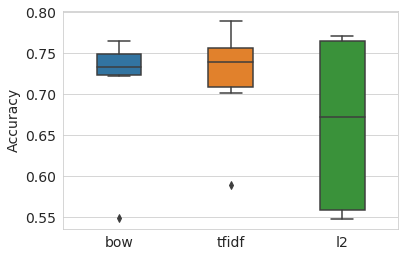

In [86]:
from sklearn.model_selection import GridSearchCV

# 探索範囲を指定して、5分割でグリッドサーチを実行します
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}

# Bag-of-Wordsでの分類器をチューニング
bow_search = GridSearchCV(LogisticRegression(solver='liblinear'), cv=5, param_grid=param_grid_)
bow_search.fit(X_tr_bow, y_tr)

# L2正規化単語ベクトルでの分類器をチューニング
l2_search = GridSearchCV(LogisticRegression(solver='liblinear'), cv=5, param_grid=param_grid_)
l2_search.fit(X_tr_l2, y_tr)

# TF-IDFでの分類器をチューニング
tfidf_search = GridSearchCV(LogisticRegression(solver='liblinear'), cv=5, param_grid=param_grid_)
tfidf_search.fit(X_tr_tfidf, y_tr)

# クロスバリデーションの結果を箱ひげ図でプロットする
# 分類器のパフォーマンスを可視化して比較する
search_results = pd.DataFrame.from_dict({
    'bow': bow_search.cv_results_['mean_test_score'],
    'tfidf': tfidf_search.cv_results_['mean_test_score'],
    'l2': l2_search.cv_results_['mean_test_score']
})

# matplotlibでグラフを描く。ここでSeabornはグラフの見た目を整える為に用いている。
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

In [87]:
# クロスバリデーションで得られた最適なハイパーパラメータと学習用データ全てを用いて最終的なモデルを学習し、そのモデルを用いて検証用データにおける精度を算出する
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow',  _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized',  _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf',  _C=tfidf_search.best_params_['C'])

Test score with bow features: 0.7682606410930111
Test score with l2-normalized features: 0.7856016815554387
Test score with tf-idf features: 0.792433000525486
